<a href="https://colab.research.google.com/github/MohamedMukhtar89CN/MMukhtar_Ibrahim-_app/blob/main/FINAL_Project_Model_of_Loan_Approval_Prediction_DS410_M_Mukhtar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')

In [4]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
print(df.iloc[0])

id                                    0
person_age                           37
person_income                     35000
person_home_ownership              RENT
person_emp_length                     0
loan_intent                   EDUCATION
loan_grade                            B
loan_amnt                          6000
loan_int_rate                     11.49
loan_percent_income                0.17
cb_person_default_on_file             N
cb_person_cred_hist_length           14
loan_status                           0
Name: 0, dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [6]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

In [7]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                                  id  person_age  person_income  \
id                          1.000000    0.008608      -0.001896   
person_age                  0.008608    1.000000       0.102176   
person_income              -0.001896    0.102176       1.000000   
person_emp_length           0.005376    0.121276       0.164042   
loan_amnt                  -0.000403    0.050378       0.310942   
loan_int_rate              -0.003454    0.009653      -0.057611   
loan_percent_income        -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length  0.008139    0.874260       0.082727   
loan_status                -0.008138   -0.001130      -0.169956   

                            person_emp_length  loan_amnt  loan_int_rate  \
id                                   0.005376  -0.000403      -0.003454   
person_age                           0.121276   0.050378       0.009653   
person_income                        0.164042   0.310942      -0.057611   
person_emp_length            

In [8]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df['cb_person_cred_hist_length'] = label_encoder.fit_transform(df['cb_person_cred_hist_length'])
    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])


In [9]:

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   id  person_age  person_income  person_home_ownership  person_emp_length  \
0   0          37          35000                      3                  0   
1   1          22          56000                      2                  6   
2   2          29          28800                      2                  8   
3   3          30          70000                      3                 14   
4   4          22          60000                      3                  2   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_statu

In [10]:
df.drop('id', axis=1, inplace=True)

In [11]:
df.fillna(df.mean(), inplace=True)


In [12]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

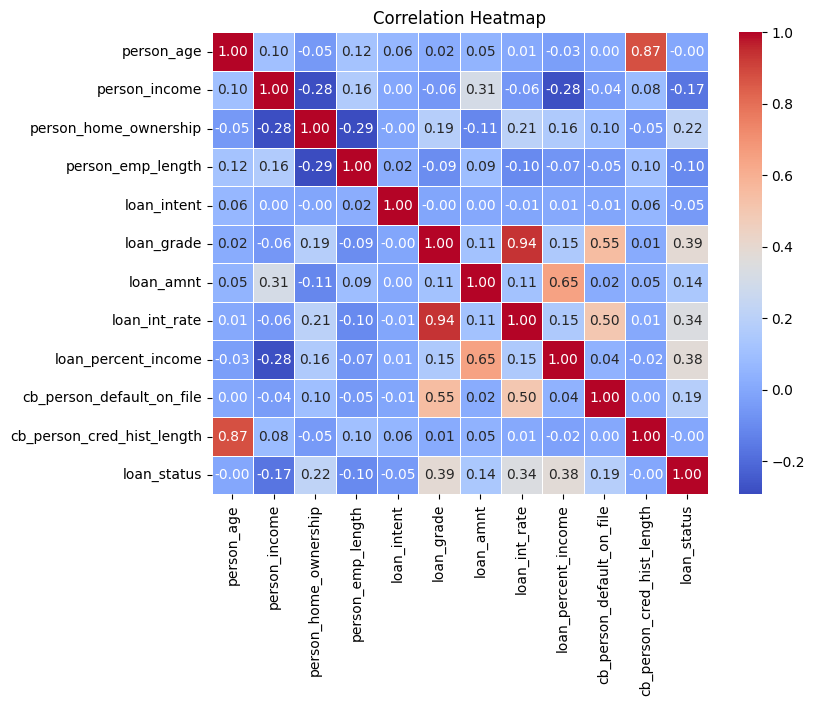

In [13]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
categorical_columns = ["person_home_ownership",
       "loan_int_rate", "loan_grade", "cb_person_cred_hist_length"]

## Encoding of categorical columns

In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

df_encoded = df.copy()

label_encoder = LabelEncoder()
for column in categorical_columns:
    df["cb_person_cred_hist_length"] = label_encoder.fit_transform(df["cb_person_cred_hist_length"])
    df["person_home_ownership"] = label_encoder.fit_transform(df["person_home_ownership"])
    df["loan_int_rate"] = label_encoder.fit_transform(df["loan_int_rate"])
    df["loan_grade"] = label_encoder.fit_transform(df["loan_grade"])
    df["cb_person_default_on_file"] = label_encoder.fit_transform(df["cb_person_default_on_file"])

features = ["person_age", "person_income", "person_home_ownership",
       "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
       "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
       "cb_person_cred_hist_length", "loan_status"]
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

df_encoded["loan_status_Log"] = np.log1p(df_encoded["loan_status"])

df_encoded.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Predicted_Loan_Approval_Status,loan_status_Log
0,1.566200,-0.765768,0.913186,-1.187200,-0.881912,-0.063697,-0.578306,0.267616,0.117378,-0.417419,2.031798,-0.407456,0.161691,-0.52333
1,-0.920057,-0.212128,0.224728,0.328047,0.278934,0.892168,-0.937775,0.880532,-0.973242,-0.417419,-0.946489,-0.407456,0.105822,-0.52333
2,0.240196,-0.929223,0.224728,0.833130,0.859357,-1.019563,-0.578306,-0.585854,0.553626,-0.417419,1.039036,-0.407456,0.066258,-0.52333
3,0.405947,0.156966,0.913186,2.348377,1.439780,-0.063697,0.500101,0.142396,0.117378,-0.417419,-0.201917,-0.407456,0.073774,-0.52333
4,-0.920057,-0.106673,0.913186,-0.682117,0.278934,-1.019563,-0.578306,-1.238314,-0.646056,-0.417419,-0.698298,-0.407456,0.000842,-0.52333


In [79]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,int64
person_emp_length,int64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,int64
loan_percent_income,float64
cb_person_default_on_file,int64


In [80]:
# Scale numerical features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']])

df_scaled = pd.DataFrame(scaled_features, columns=['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

In [81]:
df.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Predicted_Loan_Approval_Status
0,37,35000,3,0,1,1,6000,119,0.17,0,12,0,0.161691
1,22,56000,2,6,3,2,4000,178,0.07,0,0,0,0.105822
2,29,28800,2,8,4,0,6000,49,0.21,0,8,0,0.066258
3,30,70000,3,14,5,1,12000,108,0.17,0,3,0,0.073774
4,22,60000,3,2,3,0,6000,14,0.10,0,1,0,0.000842
5,27,45000,3,2,5,0,9000,50,0.20,0,3,0,0.044812
6,25,45000,0,9,1,0,12000,10,0.27,0,1,0,0.135555
7,21,20000,3,0,4,2,2500,184,0.13,1,1,0,0.176411
8,37,69600,3,11,1,3,5000,230,0.07,1,9,0,0.241780
9,35,110000,0,0,0,2,15000,164,0.14,1,4,0,0.120038


In [82]:
df.info

<bound method DataFrame.info of        person_age  person_income  person_home_ownership  person_emp_length  \
0              37          35000                      3                  0   
1              22          56000                      2                  6   
2              29          28800                      2                  8   
3              30          70000                      3                 14   
4              22          60000                      3                  2   
...           ...            ...                    ...                ...   
58640          34         120000                      0                  5   
58641          28          28800                      3                  0   
58642          23          44000                      3                  7   
58643          22          30000                      3                  2   
58644          31          75000                      0                  2   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0                1           1       6000            119                 0.17   
1                3           2       4000            178                 0.07   
2                4           0       6000             49                 0.21   
3                5           1      12000            108                 0.17   
4                3           0       6000             14                 0.10   
...            ...         ...        ...            ...                  ...   
58640            1           3      25000            267                 0.21   
58641            3           2      10000            156                 0.35   
58642            1           3       6800            270                 0.15   
58643            1           0       5000             49                 0.17   
58644            5           1      15000            108                 0.20   

       cb_person_default_on_file  cb_person_cred_hist_length  loan_status  \
0                              0                          12            0   
1                              0                           0            0   
2                              0                           8            0   
3                              0                           3            0   
4                              0                           1            0   
...                          ...                         ...          ...   
58640                          1                           8            0   
58641                          0                           6            1   
58642                          0                           0            1   
58643                          0                           1            0   
58644                          0                           3            0   

       Predicted_Loan_Approval_Status  
0                            0.161691  
1                            0.105822  
2                            0.066258  
3                            0.073774  
4                            0.000842  
...                               ...  
58640                        0.191127  
58641                        0.514643  
58642                        0.321520  
58643                        0.065178  
58644                        0.054606  

[58645 rows x 13 columns]>

In [83]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Predicted_Loan_Approval_Status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,107.031802,0.159238,0.148384,3.813556,0.142382,0.114113
std,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,80.270743,0.091692,0.355484,4.029196,0.349445,0.155571
min,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.205819
25%,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,34.000000,0.090000,0.000000,1.000000,0.000000,0.001016
50%,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,98.000000,0.140000,0.000000,2.000000,0.000000,0.078882
75%,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,165.000000,0.210000,0.000000,6.000000,0.000000,0.191156
max,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,361.000000,0.830000,1.000000,28.000000,1.000000,1.667131


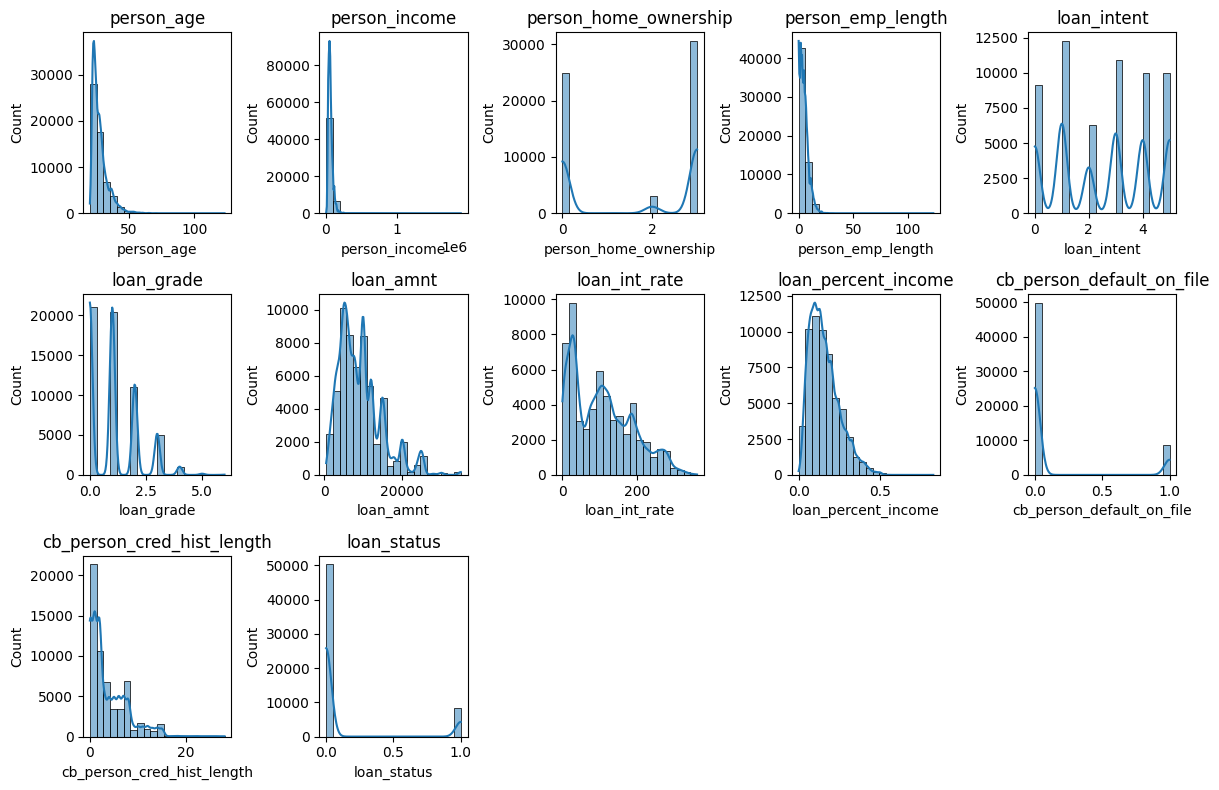

In [84]:
# Data Distribution
numerical_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Manage outliers

In [85]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Predicted_Loan_Approval_Status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,107.031802,0.159238,0.148384,3.813556,0.142382,0.114113
std,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,80.270743,0.091692,0.355484,4.029196,0.349445,0.155571
min,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.205819
25%,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,34.000000,0.090000,0.000000,1.000000,0.000000,0.001016
50%,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,98.000000,0.140000,0.000000,2.000000,0.000000,0.078882
75%,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,165.000000,0.210000,0.000000,6.000000,0.000000,0.191156
max,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,361.000000,0.830000,1.000000,28.000000,1.000000,1.667131


In [86]:
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:

    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

    # Smooth outliers using a rolling median
df["person_age"] = df["person_age"].rolling(window=5, center=True).median()
df["person_emp_length"] = df["person_emp_length"].rolling(window=5, center=True).median()
df["loan_percent_income"] = df["loan_percent_income"].rolling(window=5, center=True).median()
df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].rolling(window=5, center=True).median()
df["loan_int_rate"] = df["loan_int_rate"].rolling(window=5, center=True).median()

df.fillna(df.mean(), inplace=True)

# Save the smoothed dataset
df.to_csv("Smoothed_data.csv", index=False)
print("Outliers have been smoothed and saved as 'Smoothed_data.csv'.")

Outliers have been smoothed and saved as 'Smoothed_data.csv'.


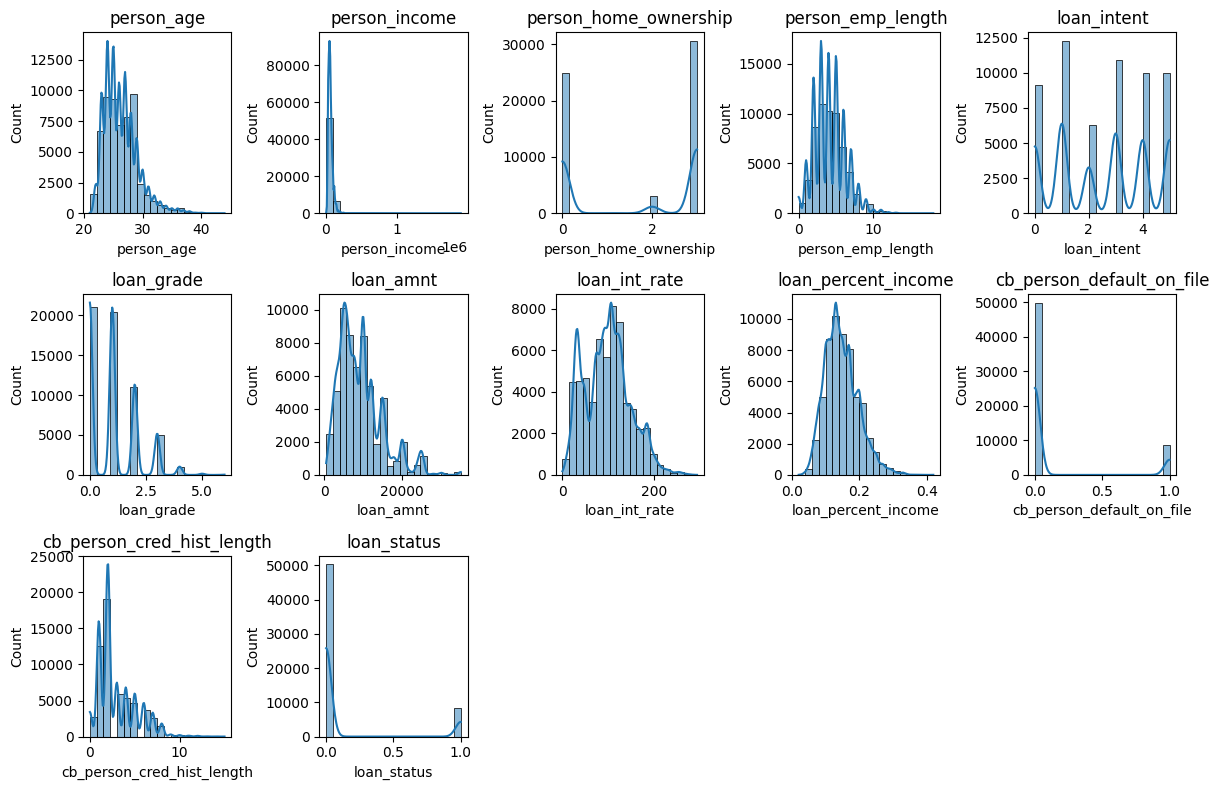

In [87]:
# Data Distribution
numerical_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [64]:
df = pd.read_csv('/content/Smoothed_data.csv')


df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,26.179833,35000,3,4.117395,1,1,6000,83.78324,0.145993,0,3.641582,0
1,26.179833,56000,2,4.117395,3,2,4000,83.78324,0.145993,0,3.641582,0
2,27.000000,28800,2,6.000000,4,0,6000,77.00000,0.170000,0,5.000000,0


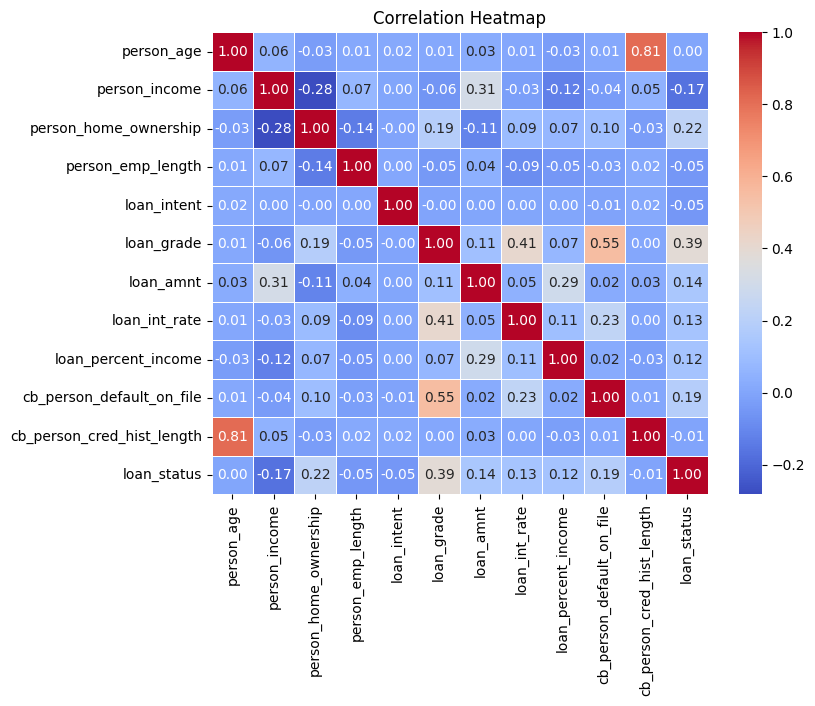

In [65]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

# Model creation

In [66]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [67]:
df.dtypes

,0
person_age,float64
person_income,int64
person_home_ownership,int64
person_emp_length,float64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,int64


In [68]:
# Split data
# smoothed_data.csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

features = ["person_age", "person_income", "person_home_ownership",
       "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
       "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
       "cb_person_cred_hist_length"]

X = df_encoded[features]
y = df_encoded["loan_status"]


# Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)
    mae = mean_absolute_error(y_test_original, y_pred)

    results[name] = mae
    print(f"{name} - MAE: {mae:.4f}")


best_model = min(results, key=results.get)
print(f" Best Model: {best_model}  MAE = {results[best_model]:.4f}")

Linear Regression - MAE: 1.6971
Random Forest - MAE: 0.8796
XGBoost - MAE: 0.9778
 Best Model: Random Forest  MAE = 0.8796


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

classification_features_full = features

X_full = df_encoded[classification_features_full]
y_full = df["loan_status"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

classification_models_full = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
}

classification_results_full = {}

for name, model in classification_models_full.items():
    model.fit(X_train_full, y_train_full)
    y_pred_full = model.predict(X_test_full)

    accuracy = accuracy_score(y_test_full, y_pred_full)
    f1 = f1_score(y_test_full, y_pred_full)

    classification_results_full[name] = {"Accuracy": accuracy, "F1-Score": f1}

    print(f"{name} - Accuracy: {accuracy:.4f},")


best_classification_model_full = max(classification_results_full, key=lambda k: classification_results_full[k]["F1-Score"])
print(f" Best Classification Model: {best_classification_model_full} ")

Logistic Regression - Accuracy: 0.8947,
Random Forest - Accuracy: 0.9423,
XGBoost - Accuracy: 0.9478,
 Best Classification Model: XGBoost 


In [71]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
print(df.iloc[0])

id                                    0
person_age                           37
person_income                     35000
person_home_ownership              RENT
person_emp_length                     0
loan_intent                   EDUCATION
loan_grade                            B
loan_amnt                          6000
loan_int_rate                     11.49
loan_percent_income                0.17
cb_person_default_on_file             N
cb_person_cred_hist_length           14
loan_status                           0
Name: 0, dtype: object


In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load the dataset
df = pd.read_csv("/content/Loan approval prediction (1).csv")

# Drop unnecessary columns
df.drop(columns=["id"], inplace=True)


# Encode categorical variables
categorical_columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
features = ["person_age", "person_income", "person_home_ownership",
            "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
            "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
            "cb_person_cred_hist_length"]

X_loan_approval = df[features]
y_loan_approval = np.log1p(df["loan_status"])  # Log-transform the target variable

# Split dataset
X_train_loan_approval, X_test_loan_approval, y_train_loan_approval, y_test_loan_approval = train_test_split(X_loan_approval, y_loan_approval, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_loan_approval = scaler.fit_transform(X_train_loan_approval)
X_test_loan_approval = scaler.transform(X_test_loan_approval)

# Train the regression model
loan_approval_model = LinearRegression()
loan_approval_model.fit(X_train_loan_approval, y_train_loan_approval)

# Predict loan status
y_pred_loan_approval_log = loan_approval_model.predict(X_test_loan_approval)
y_pred_loan_approval = np.expm1(y_pred_loan_approval_log)  # Undo log transformation
loan_approval_mae = mean_absolute_error(np.expm1(y_test_loan_approval), y_pred_loan_approval)

# Add predictions to the dataset
df["Predicted_Loan_Approval_Status"] = np.expm1(loan_approval_model.predict(scaler.transform(X_credit)))

# Train a classification model
classification_features = features + ["Predicted_Loan_Approval_Status"]
X_classification = df[classification_features]
y_classification = df["loan_status"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train_class, y_train_class)

# Predict classification outcome
y_pred_class = classification_model.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
# New customer prediction
id_input = np.array([[37, 35000, 2, 0, 2, 1, 6000, 11.55, 0.27, 0, 14]])  # Fixed feature structure
id_scaled = scaler.transform(id_input)

# Predict loan status using the trained regression model
predicted_loan_status_log = loan_approval_model.predict(id_scaled)
predicted_loan_status = np.expm1(predicted_loan_status_log)  # Undo log transformation

# Concatenating predicted loan status for final classification prediction
new_customer_with_loan_status = np.hstack((id_scaled, predicted_loan_status.reshape(-1, 1)))
predicted_exit = classification_model.predict(new_customer_with_loan_status)

# Final decision based on classification output
exit_status = "Rejected" if predicted_exit[0] == 1 else "Approved"

print(f"Predicted Loan Status: {predicted_loan_status[0]:.2f}")
print(f"Customer Prediction: {exit_status}")



Predicted Loan Status: 0.28
Customer Prediction: Approved


In [99]:
import joblib

# Save models
joblib.dump(loan_approval_model, "loan_approval.pkl")
joblib.dump(classification_model, "classification_model.pkl")

# Save scalers
joblib.dump(scaler, "scaler.pkl")

# Save encoders
joblib.dump(label_encoder_cb_person_default_on_file, "label_encoder_cb_person_default_on_file.pkl")
joblib.dump(label_encoder_loan_grade, "label_encoder_loan_grade.pkl")
joblib.dump(label_encoder_loan_intent, "label_encoder_loan_intent.pkl")
joblib.dump(label_encoder_person_home_ownership, "label_encoder_person_home_ownership.pkl")



print(" Models, scalers, and encoders saved successfully!")


 Models, scalers, and encoders saved successfully!


In [101]:
pip freeze > requirements.txt

Accuracy of classifier & model

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation Scores: [0.93712702 0.9368006  0.9411702  0.94298199 0.93616114]
Mean CV Score: 0.938848190833961
